# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [15]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

import yfinance as yf
import datetime as dt
from scipy.optimize import minimize

# 1. High risk profile

To create a high risk profile, we consider the meme stocks AMC and GME.

In [32]:
#Two years of data for AMC and GME
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()
tickers = ['AMC','GME']

stock = yf.download(tickers, start = start_date, end = end_date)




/var/folders/b2/sgtqc2y97s5_wfhhb8wbrwgr0000gn/T/ipykernel_5071/2297280152.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  2 of 2 completed


In [34]:
#compute log of daily returns
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()



#Compute volatility of each stock
{ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

{'AMC': 1.0612373303852458, 'GME': 1.092460456598155}

In [18]:
annualized_volatility

{'AMC': 1.0612373303852458, 'GME': 1.092460456598155}

The volatilities are quite high. This indicates high risk.

In [36]:
# Compute covariance matrix
covariance_matrix = 252*((daily_returns).cov())

In [37]:
covariance_matrix

Ticker,AMC,GME
Ticker,,
AMC,1.128482,0.599124
GME,0.599124,1.195862


High correlation is expected, as meme stocks tend be invested by the same group of avid investors.

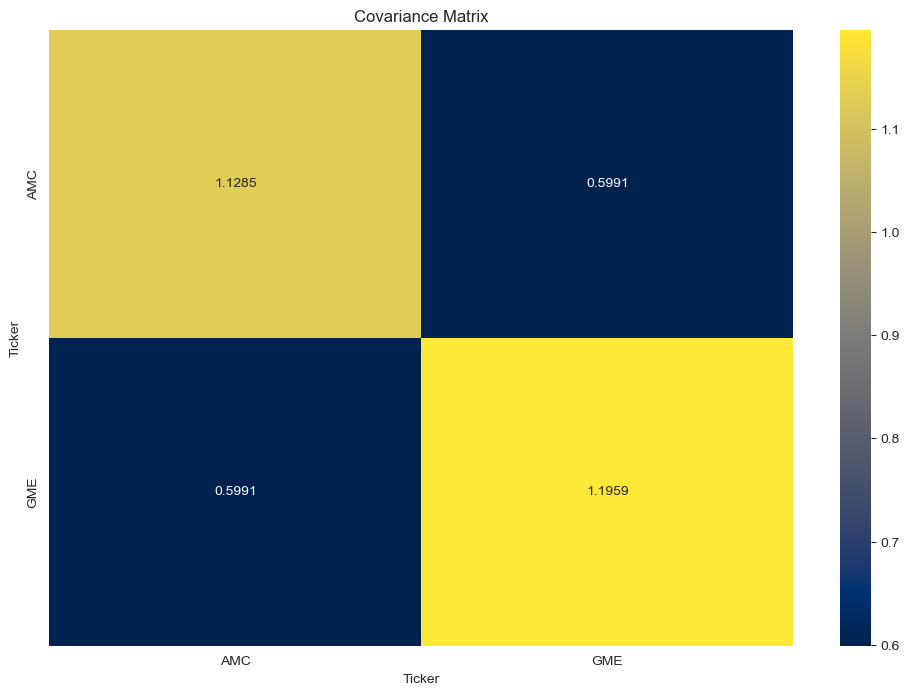

In [38]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [39]:

#Find a set of weights which minimizes the historical portfolio's volatility


# Number of assets
n_assets = len(tickers)

# Initial guess for weight assets
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
#Sum of weights equals 1, allow for negative weights to allow for short selling stocks.
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
AMC: Weight = 0.5299
GME: Weight = 0.4701


In [40]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.9378911717791537


Taking a portfolio out of AMC and GME enables to reduce volatility, but the resulting volatility is still quite high.

## 2. Low risk portfolio

To reduce risk, let's take a portfolio made out of ETFs made from different sectors. We went to https://www.ssga.com/us/en/intermediary/capabilities/equities/sector-investing/sector-and-industry-etfs and found out the sector ETFs.

In [41]:
#Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()
tickers = ['XLSR','XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU'] #The sector ETFs

#logreturn data
stock = yf.download(tickers, start = start_date, end = end_date)

#log daily returns
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()


#Volatilities
{ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}


/var/folders/b2/sgtqc2y97s5_wfhhb8wbrwgr0000gn/T/ipykernel_5071/1178343865.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  12 of 12 completed


{'XLSR': 0.1715712421060125,
 'XLC': 0.17952541621203275,
 'XLY': 0.2184446988246615,
 'XLP': 0.12095272001570202,
 'XLE': 0.22135080911560315,
 'XLF': 0.16771125572909984,
 'XLV': 0.13548414291486402,
 'XLI': 0.16446964496995783,
 'XLB': 0.16979311429873914,
 'XLRE': 0.18099852747013845,
 'XLK': 0.24601981523499442,
 'XLU': 0.17242365447937247}

The sector ETFs themselves have relatively low volatility. How lower can we go if we create a portfolio out of them?

In [42]:
# Calculate the covariance matrix
covariance_matrix = 252*((daily_returns).cov())

In [43]:
covariance_matrix

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLSR,XLU,XLV,XLY
Ticker,,,,,,,,,,,,
XLB,0.028887,0.019180,0.021385,0.021448,0.023432,0.025701,0.010579,0.020615,0.022169,0.014422,0.014041,0.025963
XLC,0.019180,0.032294,0.015710,0.019873,0.020672,0.033257,0.007901,0.014851,0.026404,0.008779,0.011267,0.030456
XLE,0.021385,0.015710,0.049094,0.021778,0.021485,0.019912,0.006735,0.014613,0.019562,0.014073,0.010328,0.019508
XLF,0.021448,0.019873,0.021778,0.028183,0.023303,0.023915,0.010186,0.018553,0.022687,0.014035,0.013808,0.025679
XLI,0.023432,0.020672,0.021485,0.023303,0.027104,0.029339,0.008839,0.018975,0.024325,0.013144,0.013635,0.027568
XLK,0.025701,0.033257,0.019912,0.023915,0.029339,0.060647,0.005711,0.016366,0.039116,0.008584,0.013282,0.042094
XLP,0.010579,0.007901,0.006735,0.010186,0.008839,0.005711,0.014659,0.012862,0.008131,0.011760,0.010146,0.009949
XLRE,0.020615,0.014851,0.014613,0.018553,0.018975,0.016366,0.012862,0.032826,0.016953,0.020137,0.014798,0.021501
XLSR,0.022169,0.026404,0.019562,0.022687,0.024325,0.039116,0.008131,0.016953,0.029496,0.010764,0.013126,0.032929


We can see that the sector ETFs have very low correlation with each other. So combining them should give even lower volatility.

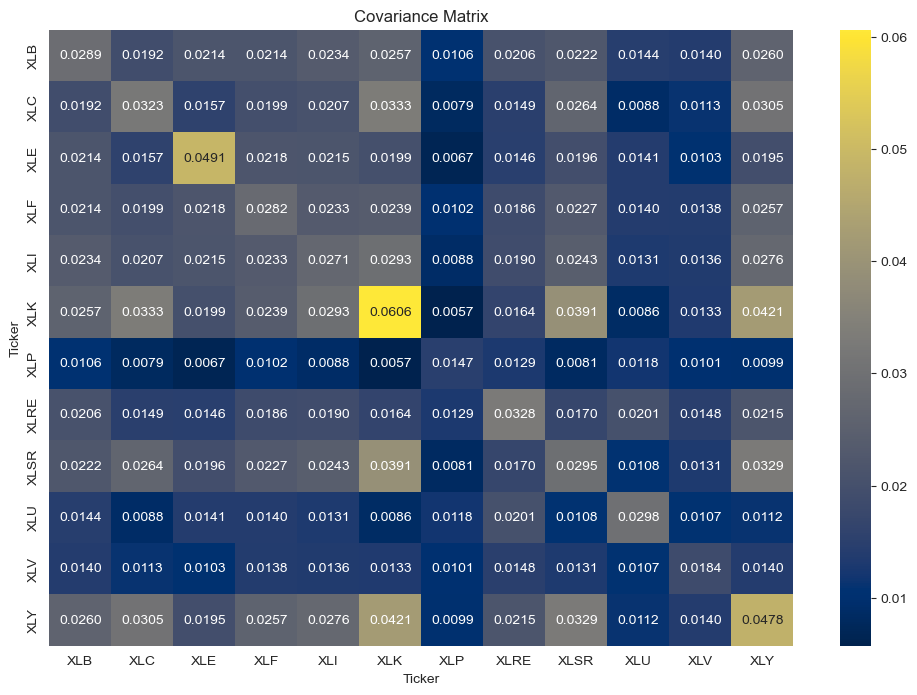

In [45]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [46]:

#Find a set of weights which minimizes a historical portfolio's volatility subject to the following investment constraints


# Number of assets
n_assets = len(tickers)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints: sum of weights equals 1 
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

# Objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
XLSR: Weight = -0.0864
XLC: Weight = 0.1559
XLY: Weight = 0.0879
XLP: Weight = -0.0918
XLE: Weight = 0.1257
XLF: Weight = 0.0287
XLV: Weight = 0.5944
XLI: Weight = -0.0870
XLB: Weight = 0.0638
XLRE: Weight = 0.0783
XLK: Weight = 0.2425
XLU: Weight = -0.1121


In [47]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.10772889898308803


We were able to lower the volatility further. This is quite lower risk than the high-risk portfolio considered earlier.